[View in Colaboratory](https://colab.research.google.com/github/thimotio/ExpertSystem/blob/master/Froth_Flotation_Fuzzy_Control_v01.ipynb)

# Fuzzy Control Systems: Iron Ore Froth Flotation


---

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flotation_cell.jpg/450px-Flotation_cell.jpg)

##The Froth Flotation 
[wikipedia](https://en.wikipedia.org/wiki/Froth_flotation)

> Froth flotation is a process for selectively separating hydrophobic materials from hydrophilic. This is used in mineral processing, paper recycling and waste-water treatment industries. Historically this was first used in the mining industry, where it was one of the great enabling technologies of the 20th century. It has been described as "the single most important operation used for the recovery and upgrading of sulfide ores".[1] The development of froth flotation has improved the recovery of valuable minerals, such as copper- and lead-bearing minerals. Along with mechanized mining, it has allowed the economic recovery of valuable metals from much lower grade ore than previously.


Foam flotation, or simply flotation, is a separation process applied to solid particles that exploits differences in surface characteristics between the various species present, treating heterogeneous mixtures of suspended particles in the aqueous phase in which a gas phase is introduced (Peres et al., 1980)

The reverse cationic flotation of iron ore has this name because it occurs in an inverse way, with the gangue the specimen floated. This gangue consists mainly of SiO2 particles with induced hydrophobic characteristics. Practically, it can be considered as a direct silica flotation.


> [1] G J Jameson, "Flotation cell development," in: The AusIMM Annual Conference, Broken Hill, New South Wales, 17–21 May 1992 (The Australasian Institute of Mining and Metallurgy: Melbourne, 1992), 25–31.


###Froth basic control - Iron Ore

Reverse quartz cationic flotation is the most commonly used itabirite iron ore concentration method for pellet feed production. Quartz is floated with etheramines partially neutralized with acetic acid and the iron minerals are depressed by unmodified starches.

Although widely used, this method has high complexity and the domain of current knowledge is consolidated in the interfacial properties that govern its dynamics and phenomenological models experienced in industrial practice.

There are several mineral and process variables that interfere with the dynamic behavior of flotation, and some of this knowledge is not completely elucidated. This is mainly due to the lack of means to measure specific properties that can explain more clearly its behavior in the face of the various interferences to which it is subject. This gap makes it very difficult to define more comprehensive models and that can represent in general the various flotation processes.

Flotation involves the recovery of minerals in two distinct phases. The pulp phase, composed mainly of a mixture of mineral particles and gangue in aqueous medium, can be adequately described by first order kinetics. The foam phase is mainly composed of bubbles and their lamellae, and no suitable general model exists to describe this phase. As a result, the first order kinetic model is usually imposed on the entire flotation process (Mathe et al., 1998).

The mechanism involved in the separation of the ore minerals and the gangue is possible thanks to the different properties of the mineral surfaces involved when in aqueous medium, at a certain pH. The addition of reagents with physicochemical characteristics capable of selectively modifying the surface properties of the minerals in relation to the solution, as well as the introduction of the gas phase into the system, creates conditions for the separation of the minerals.

In this context, the operational practice combined with the technical knowledge of the state of the art of flotation allows modeling, through knowledge-based control techniques (expert system) and the development of operating support systems that control the process variables according to pre-established rules.


# The Control Problem


---

## Control Description



## Control Design

Let's create a fuzzy control system which models froth flotation rules based on rules showed bellow

Silica = silicium grade on concentrate Ferro = iron grade on taillings inc_Aminia = increment applyed on Amina to control the process

We would formulate this problem as:

Antecednets (Inputs)
Silica
Universe (ie, crisp value range): Whats are a good value for Silicium on concentrate, on a scale of 0 to 4?
Fuzzy set (ie, fuzzy value range): Baixo, Medio, Alto
Ferro
Universe (ie, crisp value range): Whats are a good value for Iron on Taillings, on a scale of 0 to 15?
Fuzzy set (ie, fuzzy value range): Baixo, Medio, Alto
Consequents (Outputs)
tip
Universe: How much should we tip, on a scale of 0% to 25%
Fuzzy set: low, medium, high
Rules
IF the service was good or the food quality was good, THEN the tip will be high.
IF the service was average, THEN the tip will be medium.
IF the service was poor and the food quality was poor THEN the tip will be low.
Usage
If I tell this controller that I rated:
the service as 9.8, and
the quality as 6.5,
it would recommend I leave:
a 20.2% tip.
Creating the Tipping Controller Using the skfuzzy control API
We can use the skfuzzy control system API to model this. First, let's define fuzzy variables """

In [0]:

import numpy as np
import skfuzzy as fuzz
import matplotlib 
import matplotlib.pyplot
from skfuzzy import control as ctrl



In [0]:
def NewAntecedentFuzzy_Exponencial(Name, vmin, vmax, precision, Curvas ):
    #define the new Antecedent Fuzzy Variabel and set 
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, quarter1, std )
        FuzzyVar[Curvas[2]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[3]] = fuzz.gaussmf(FuzzyVar.universe, quarter2, std )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
           
    
    return FuzzyVar

In [0]:
def NewConsequenceFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
    #define the new Antecedent Fuzzy Variabel and set 
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
        FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
        FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )
           
    
    return FuzzyVar

C:\Users\flavio.silva\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


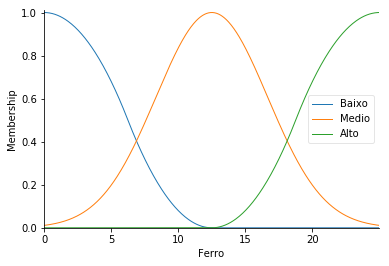

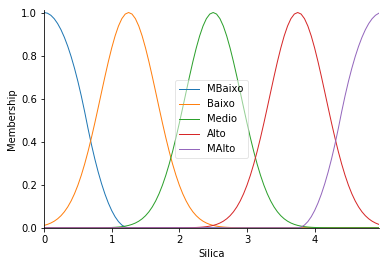

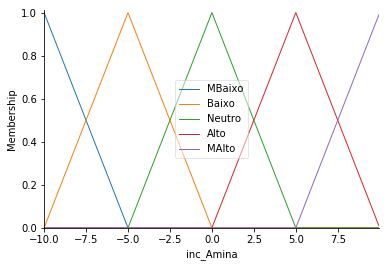

In [0]:
Names = ['Baixo', 'Medio', 'Alto']
Ferro = NewAntecedentFuzzy_Exponencial("Ferro", 0, 25, 0.05, Names)
Ferro.view()
Names = ['MBaixo','Baixo', 'Medio', 'Alto','MAlto']
Silica = NewAntecedentFuzzy_Exponencial("Silica", 0, 5, 0.05, Names)
Silica.view()
Names = ['MBaixo','Baixo', 'Neutro', 'Alto','MAlto']
inc_Amina = NewConsequenceFuzzy_Triangular("inc_Amina", -10, 10, 0.05, Names)
inc_Amina.view()
#matplotlib.use('TkAgg')


(<matplotlib.figure.Figure at 0x194816d72e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194816d79e8>)

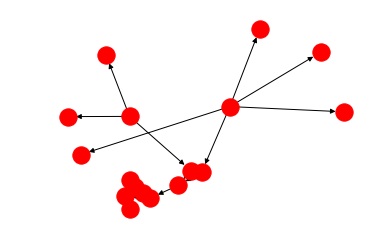

In [0]:
"""
Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.
"""

rule1 = ctrl.Rule(Silica['Medio'] & Ferro['Baixo'], inc_Amina['Neutro'])
rule2 = ctrl.Rule(Silica['Medio'] & Ferro['Medio'], inc_Amina['Neutro'])
rule3 = ctrl.Rule(Silica['Medio'] & Ferro['Alto'], inc_Amina['Baixo'])

rule4 = ctrl.Rule(Silica['Alto'] & Ferro['Baixo'], inc_Amina['MAlto'])
rule5 = ctrl.Rule(Silica['Alto'] & Ferro['Medio'], inc_Amina['MAlto'])
rule6 = ctrl.Rule(Silica['Alto'] & Ferro['Alto'], inc_Amina['Alto'])

rule7 = ctrl.Rule(Silica['Baixo'] & Ferro['Baixo'], inc_Amina['MBaixo'])
rule8 = ctrl.Rule(Silica['Baixo'] & Ferro['Medio'], inc_Amina['Baixo'])
rule9 = ctrl.Rule(Silica['Baixo'] & Ferro['Alto'], inc_Amina['Baixo'])

rule10 = ctrl.Rule(Silica['MAlto'] & Ferro['Baixo'], inc_Amina['MAlto'])
rule11 = ctrl.Rule(Silica['MAlto'] & Ferro['Medio'], inc_Amina['MAlto'])
rule12 = ctrl.Rule(Silica['MAlto'] & Ferro['Alto'], inc_Amina['Alto'])

rule13 = ctrl.Rule(Silica['MBaixo'] & Ferro['Baixo'], inc_Amina['MBaixo'])
rule14 = ctrl.Rule(Silica['MBaixo'] & Ferro['Medio'], inc_Amina['MBaixo'])
rule15 = ctrl.Rule(Silica['MBaixo'] & Ferro['Alto'], inc_Amina['Baixo'])


rule1.view()


In [0]:
"""
Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
"""

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                  rule10, rule11, rule12, rule13,rule14, rule15])

"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.  For tipping, this might be tipping
Sharon at the local brew-pub.  We would create another
``ControlSystemSimulation`` when we're trying to apply our ``tipping_ctrl``
for Travis at the cafe because the inputs would be different.
"""

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

C:\Users\flavio.silva\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


-------------------------------
Para um teor de Silica = 3.4
E teor de Ferro = 18.9
A dosagem de Amina será incrementada de = 3.322403554287642


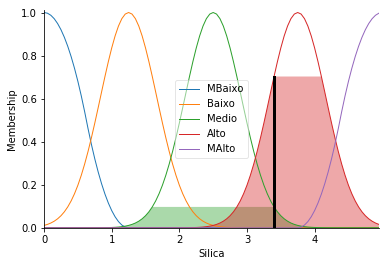

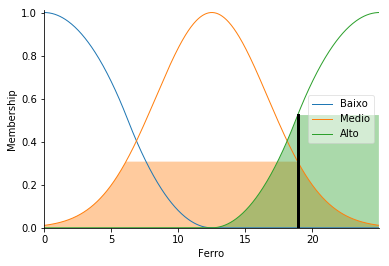

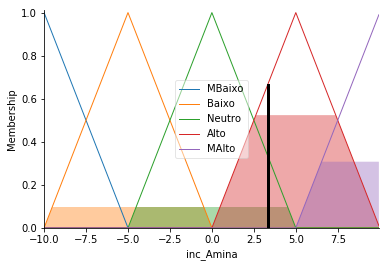

In [0]:

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

inp1 = 3.4
inp2 = 18.9
tipping.input['Silica'] = inp1
tipping.input['Ferro'] = inp2

# Crunch the numbers
tipping.compute()


"""
Once computed, we can view the result as well as visualize it.
"""
#print (tipping.output['inc_Amina'])
Silica.view(sim=tipping)
Ferro.view(sim=tipping)
inc_Amina.view(sim=tipping)

print("-------------------------------")
print("Para um teor de Silica = " + str(inp1))
print("E teor de Ferro = " + str(inp2))
print("A dosagem de Amina será incrementada de = " + str(tipping.output['inc_Amina']))



In [0]:
"""# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(0.1, 10, 21)
x = upsampled #np.meshgrid(upsampled, upsampled)
upsampled = np.linspace(0.1, 25, 21)
y = upsampled #np.meshgrid(upsampled, upsampled)
z = np.zeros_like(np.meshgrid(x, y))

print(x)
print(y)
print(z)
           
        
# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        
        #print(y[i])
        tipping.input['Silica'] = (x)
        tipping.input['Ferro'] = (y[j])
        tipping.compute()
        test = tipping.output['inc_Amina']
        
        print(test)
        z[i][j] = np.float(test)

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)
"""


"# We can simulate at higher resolution with full accuracy\nupsampled = np.linspace(0.1, 10, 21)\nx = upsampled #np.meshgrid(upsampled, upsampled)\nupsampled = np.linspace(0.1, 25, 21)\ny = upsampled #np.meshgrid(upsampled, upsampled)\nz = np.zeros_like(np.meshgrid(x, y))\n\nprint(x)\nprint(y)\nprint(z)\n           \n        \n# Loop through the system 21*21 times to collect the control surface\nfor i in range(21):\n    for j in range(21):\n        \n        #print(y[i])\n        tipping.input['Silica'] = (x)\n        tipping.input['Ferro'] = (y[j])\n        tipping.compute()\n        test = tipping.output['inc_Amina']\n        \n        print(test)\n        z[i][j] = np.float(test)\n\n# Plot the result in pretty 3D with alpha blending\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting\n\nfig = plt.figure(figsize=(8, 8))\nax = fig.add_subplot(111, projection='3d')\n\nsurf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',